In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

print(f"TensorFlow Version: {tf.__version__}")
print("✅ Đã import thư viện thành công!")

TensorFlow Version: 2.19.0
✅ Đã import thư viện thành công!


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kích thước tập huấn luyện: (60000, 28, 28, 1)
Kích thước tập kiểm tra: (10000, 28, 28, 1)


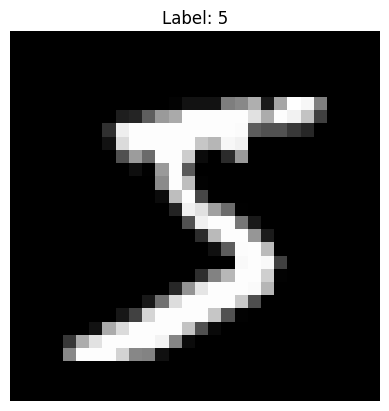

In [2]:
# 1. Tải dữ liệu
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. Reshape và Chuẩn hóa
# (60000 ảnh, cao 28, rộng 28) -> (60000, 28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

print(f"Kích thước tập huấn luyện: {train_images.shape}")
print(f"Kích thước tập kiểm tra: {test_images.shape}")

# Xem thử 1 ảnh trong bộ dữ liệu trông thế nào
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.axis('off')
plt.show()

In [3]:
model = models.Sequential()

# --- Phần trích xuất đặc trưng (Feature Extraction) ---
# Lớp 1: 32 bộ lọc
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Lớp 2: 64 bộ lọc (tăng lên để tìm đặc điểm phức tạp hơn)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Lớp 3: 64 bộ lọc
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# --- Phần phân loại (Classification) ---
model.add(layers.Flatten()) # Duỗi phẳng
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Output 10 số (0-9)

model.summary() # Xem tóm tắt mô hình

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("🚀 Bắt đầu huấn luyện...")
# Validation_split=0.1 nghĩa là cắt 10% dữ liệu train ra để chấm điểm ngay trong lúc học
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
print("✅ Huấn luyện hoàn tất!")

🚀 Bắt đầu huấn luyện...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.8886 - loss: 0.3534 - val_accuracy: 0.9825 - val_loss: 0.0635
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9853 - loss: 0.0484 - val_accuracy: 0.9870 - val_loss: 0.0444
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9893 - loss: 0.0334 - val_accuracy: 0.9857 - val_loss: 0.0508
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9880 - val_loss: 0.0426
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9875 - val_loss: 0.0438
✅ Huấn luyện hoàn tất!


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n🏆 Độ chính xác trên tập kiểm tra: {test_acc*100:.2f}%")

313/313 - 3s - 9ms/step - accuracy: 0.9881 - loss: 0.0346

🏆 Độ chính xác trên tập kiểm tra: 98.81%


In [9]:
def predict_digit(filename):
    # 1. Đọc ảnh xám
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Lỗi: Không đọc được ảnh")
        return

    # Hiển thị ảnh gốc
    print("--- Ảnh gốc ---")
    cv2_imshow(cv2.resize(img, (150, 150)))

    # =================================================
    # BƯỚC XỬ LÝ NÂNG CAO (QUAN TRỌNG)
    # =================================================

    # 1. Cắt bớt viền thừa (Crop) để số to hơn
    # (Mẹo: Tìm vùng đen nhất để crop, hoặc resize ngay nếu ảnh đã crop gọn)
    # Ở đây ta dùng Threshold trước để tách nền
    _, img_binary = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY_INV)

    # 2. Tìm khung bao quanh chữ số (Bounding Box) để crop sát vào số
    coords = cv2.findNonZero(img_binary) # Tìm tất cả điểm mực trắng
    x, y, w, h = cv2.boundingRect(coords)

    # Crop lấy phần số (cộng thêm tí viền padding=10 cho thoáng)
    pad = 10
    img_crop = img_binary[max(0, y-pad):min(img_binary.shape[0], y+h+pad),
                          max(0, x-pad):min(img_binary.shape[1], x+w+pad)]

    # 3. Resize về 28x28
    # Lưu ý: Resize trực tiếp có thể làm méo hình.
    # Nhưng để đơn giản ta resize luôn, chừng nào làm app xịn sẽ dùng padding.
    img_resized = cv2.resize(img_crop, (28, 28), interpolation=cv2.INTER_AREA)

    # 4. KỸ THUẬT LÀM ĐẬM NÉT (DILATION) - Cứu tinh cho bút nét mảnh
    # Giúp nối liền các nét đứt do thu nhỏ
    kernel = np.ones((2, 2), np.uint8)
    img_final = cv2.dilate(img_resized, kernel, iterations=1)

    print("--- Ảnh máy sẽ đọc (Đã crop & làm đậm) ---")
    cv2_imshow(cv2.resize(img_final, (150, 150))) # Zoom lên cho anh xem

    # Chuẩn hóa
    img_input = img_final.astype('float32') / 255.0
    img_input = img_input.reshape(1, 28, 28, 1)

    # Dự đoán
    prediction = model.predict(img_input)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"\n>>> 🤖 KẾT QUẢ MỚI: Số {predicted_label}")
    print(f">>> Độ tự tin: {confidence*100:.2f}%")

Hãy upload ảnh chữ số viết tay của anh (số 0-9)...


Saving z7301907448170_f96c8016502b08106c0f5fcd4c21fb84.jpg to z7301907448170_f96c8016502b08106c0f5fcd4c21fb84.jpg
--- Ảnh gốc ---


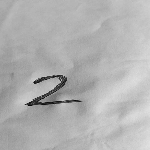

--- Ảnh máy sẽ đọc (Đã crop & làm đậm) ---


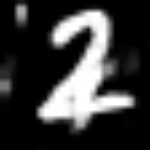

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

>>> 🤖 KẾT QUẢ MỚI: Số 2
>>> Độ tự tin: 100.00%


In [21]:
print("Hãy upload ảnh chữ số viết tay của anh (số 0-9)...")
uploaded = files.upload()

for fn in uploaded.keys():
    predict_digit(fn)